In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from image_extractor import preprocess_hsv
from skimage.feature import graycomatrix, graycoprops

# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (29).JPG'
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Brittle/image (87).JPG'
image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (10).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Purple/image (100).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_White/image (23).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_White/image (72).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Slaty/image (71).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Slaty/image (56).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Moldered/image (7).JPG'


plt.rcParams['figure.dpi'] = 102.46
plt.rcParams["figure.figsize"] = (12,6)

image  = cv2.imread(image_dir)
image_hsv, cnt, ellipse = preprocess_hsv(image)
h,s,val = cv2.split(image_hsv)

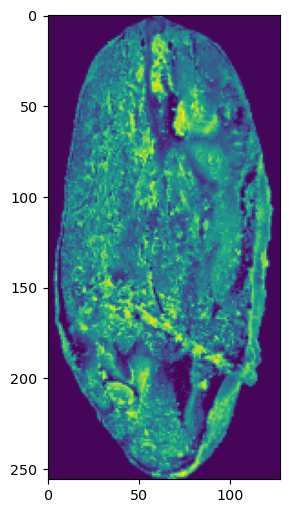

In [8]:
clahe_op = cv2.createCLAHE(4, (8,8))
val = clahe_op.apply(val)
val = cv2.resize(val, (128,256))

plt.imshow(val)
plt.show()

bins = np.linspace(0, 256, 33)
digitize = np.digitize(val, bins) - 1

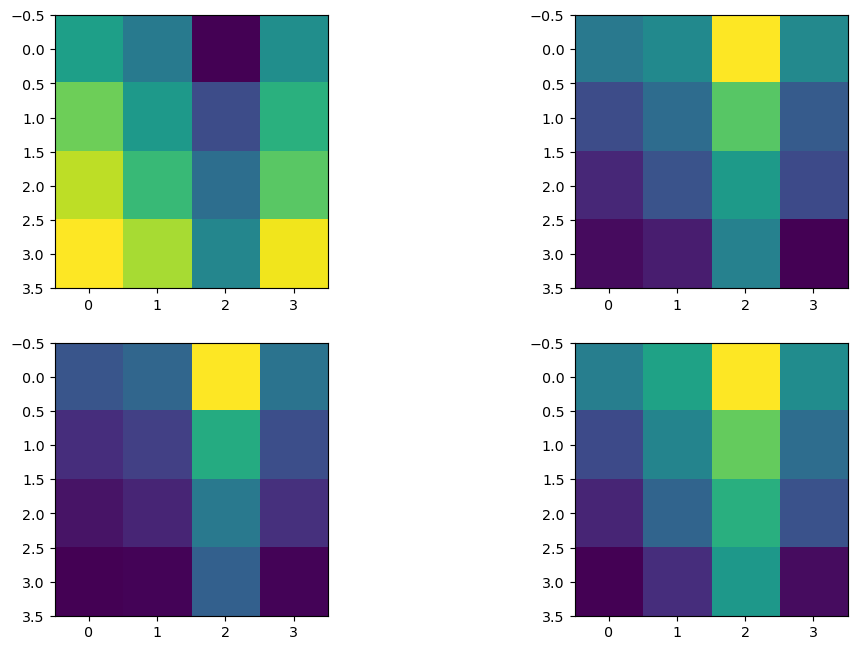

In [9]:
plt.rcParams["figure.figsize"] = (12,12)
level = 32
glcm = graycomatrix(digitize, [5,7,9,11], [0, np.pi/4, np.pi/2, 3*np.pi/4], level, True, False)
glcm = glcm[1:level-1,1:level-1]
glcm_cons = graycoprops(glcm, 'contrast')
glcm_dissimilarity = graycoprops(glcm, 'dissimilarity')
glcm_energy = graycoprops(glcm, 'ASM')
glcm_correlation = graycoprops(glcm, 'correlation')
glcm_homogeneity = graycoprops(glcm, 'homogeneity')
# print(glcm[:,:,0,0])
# for i in range(4):
#     for j in range(4):
#         mat = glcm[1:level-2,1:level-2,i,j]
#         plt.subplot(4,4,i*4+j+1)
#         plt.imshow(mat)

plt.subplot(3,2,1)
plt.imshow(glcm_cons)
plt.subplot(3,2,2)
plt.imshow(glcm_homogeneity)
plt.subplot(3,2,3)
plt.imshow(glcm_energy)
plt.subplot(3,2,4)
plt.imshow(glcm_correlation)
plt.show()